Start by some imports and reading the data

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

RootDir = "/kaggle/input/sentimental-analysis-for-tweets"


filename = RootDir + "/sentiment_tweets3.csv"
df = pd.read_csv(filename)
print (df.shape)

(10314, 3)


We have 10,314 tweets in our dataset. Each one has a label: 0=not depressed, 1=depressed. Let's get the tweets (input) and labels (output), and print a sample of each ttype of tweet:

In [9]:
tweets = df.values[:,1]
labels = df.values[:,2].astype(float)
print (tweets[40], labels[40])
print (tweets[8002], labels[8002])

someone turn on the shower please!!  0.0
depression is something i don't speak about even going through it because it's also such a double edged sword. i love every race. even if white people had done so much i can't hate them all. my grandma is legit white! how tf can i hate, i do dislike people though. 1.0


Next, we load BERT:

In [10]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')

We can now run the BERT model on all tweets to get their encoding

In [11]:
embeddings = bert_model.encode(tweets, show_progress_bar=True)
print (embeddings.shape)

Batches:   0%|          | 0/323 [00:00<?, ?it/s]

(10314, 768)


The embeddings will be our features to train a classifier, but first we need tp split the data into training and test sets:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, 
                                          test_size=0.2, random_state=42)
print ("Training set shapes:", X_train.shape, y_train.shape)
print ("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (8251, 768) (8251,)
Test set shapes: (2063, 768) (2063,)


There are 768 features in the embedding vector for every tweet. Now build a simple classification model to work on them

In [13]:
from tensorflow.keras import Sequential, layers

classifier = Sequential()
classifier.add (layers.Dense(256, activation='relu', input_shape=(768,)))
classifier.add (layers.Dense(1, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
    
hist = classifier.fit (X_train, y_train, epochs=10, batch_size=16, 
                      validation_data=(X_test, y_test))

Epoch 1/10
516/516 [==============================] - 2s 3ms/step - loss: 0.1109 - accuracy: 0.9532 - val_loss: 0.0462 - val_accuracy: 0.9845
Epoch 2/10
516/516 [==============================] - 1s 2ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0487 - val_accuracy: 0.9864
Epoch 3/10
516/516 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9877 - val_loss: 0.0396 - val_accuracy: 0.9864
Epoch 4/10
516/516 [==============================] - 2s 3ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.0396 - val_accuracy: 0.9874
Epoch 5/10
516/516 [==============================] - 1s 2ms/step - loss: 0.0146 - accuracy: 0.9947 - val_loss: 0.0506 - val_accuracy: 0.9830
Epoch 6/10
516/516 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0385 - val_accuracy: 0.9874
Epoch 7/10
516/516 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0560 - val_accuracy: 0.9859
Epoch 

In [14]:


# for i in range(len(X_test)):
#     print("X=%s, Predicted=%s" % (X_test[i], y_1[i]))

In [27]:
df_word_h = pd.read_parquet('../input/happyandsad/happy_tweets.paraquet')

In [33]:
embeddings = bert_model.encode(df_word_h['text'], show_progress_bar=True)
print (embeddings.shape)

Batches:   0%|          | 0/353 [00:00<?, ?it/s]

(11281, 768)


In [35]:
y_1 = classifier.predict_classes(embeddings)

In [37]:
df_word_h['labels'] = y_1.tolist()

In [38]:
for x in range(len(df_word_h['labels'])):
    df_word_h['labels'][x] =  df_word_h['labels'][x][0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df_word_h
print (df_word_h['text'][679], df_word_h['labels'][679])
# print (df_word_h[8002], df_word_h[8002])

i ve genuinely always wondered what 1d0ls think when they go to america and see the food lmao 0


In [40]:
df_word_h.to_parquet('happyish_tweets.paraquet',engine = 'pyarrow')

In [22]:
# assign location
path='./'
 
# save
classifier.save('gfgModel.h5')

Plot the loss and accuracy:

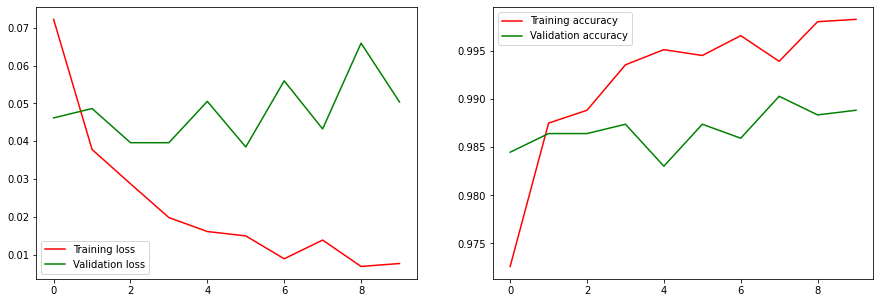

In [23]:
from matplotlib import pyplot

pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(hist.history['loss'], 'r', label='Training loss')
pyplot.plot(hist.history['val_loss'], 'g', label='Validation loss')
pyplot.legend()
pyplot.subplot(1, 2, 2)
pyplot.plot(hist.history['accuracy'], 'r', label='Training accuracy')
pyplot.plot(hist.history['val_accuracy'], 'g', label='Validation accuracy')
pyplot.legend()
pyplot.show()

It seems we reach a very good prediction accuracy (>98%) immediately, with almost no improvement by additional epochs